# Whelks and lobsters -- split context

In [1]:
%display plain
%matplotlib inline

import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

## The system

In [2]:
from ulbc.symbolic import var

In [3]:
from ulbc.interval_utils import fintervals

In [19]:
RNG.<x,y> = RIF[]

In [20]:
from ulbc import *

In [21]:
us = [x,y]
k=RIF(0.8); b=RIF(0.6); c=RIF(0.3); e=RIF(0.05); f=RIF(2)
vf = vector([b*x*(RIF(1)-x) - c*x*(k-x)*y,
            -e*y*(RIF(1)+y)+f*x*(k-x)*y])
v0 = [RIF(0.5), RIF(2.0)]
v1 = [RIF(0.4), RIF(2.5)]
v2 = vector([RIF(1,1.1), RIF(4,5)])

In [22]:
v3 = vector([RIF(1,1.05), RIF(4,4.5)])

In [23]:
def plot_box(B, **kwargs):
    if 'color' not in kwargs:
        kwargs['color'] = 'orange'
    return polygon(
        [(B[0].lower(), B[1].lower()),
         (B[0].lower(), B[1].upper()),
         (B[0].upper(), B[1].upper()),
         (B[0].upper(), B[1].lower())],
        **kwargs,
    )

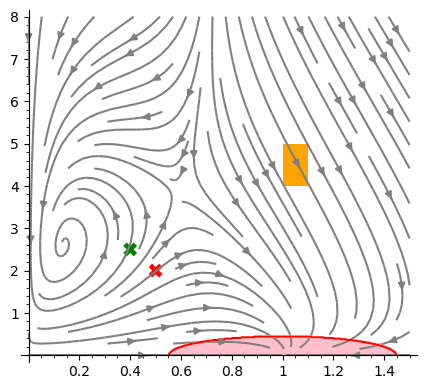

In [24]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + point(v0, size=100, marker='X', color='red')\
    + point(v1, size=100, marker='X', color='green')\
    + plot_box(v2, color='orange')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()

In [25]:
RNG

Multivariate Polynomial Ring in x, y over Real Interval Field with 53 bits of precision

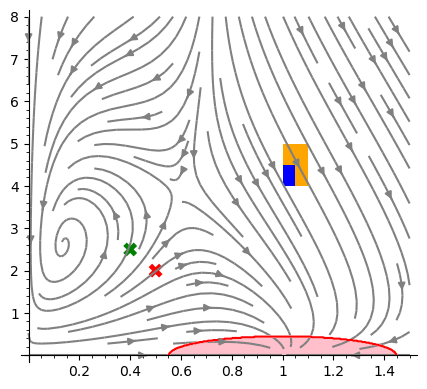

In [26]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + point(v0, size=100, marker='X', color='red')\
    + point(v1, size=100, marker='X', color='green')\
    + plot_box(v2, color='orange')\
    + plot_box(v3, color='blue')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()

In [12]:
v3c = vector([RIF(0, 0.05), RIF(0, 0.5)])

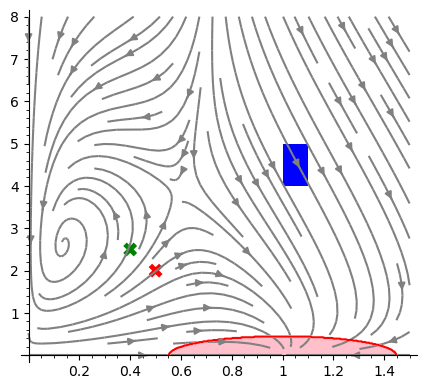

In [13]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + point(v0, size=100, marker='X', color='red')\
    + point(v1, size=100, marker='X', color='green')\
    + plot_box(v2, color='orange')\
    + plot_box(v3 + v3c, color='blue')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()

In [14]:
v3s = vector([RIF(0, 0.05), RIF(0, 0.5)]); fintervals(v3s)

'[[0.0000000000000000 .. 0.050000000000000003], [0.0000000000000000 .. 0.50000000000000000]]'

In [15]:
v2b = v3 + v3s; fintervals(v2b)

'[[1.0000000000000000 .. 1.1000000000000001], [4 .. 5]]'

In [17]:
from ulbc.bondcalculus import System

In [27]:
system = System(RNG, us, v2, vf)

In [28]:
P = Atomic((x - 1)^2 + y^2 - 0.2)

In [56]:
kwargs = dict(
    order=5, step=(0.01, 0.5),
    precondition=1,
    estimation=1e-3,
    integration_method=IntegrationMethod.LOW_DEGREE,
    cutoff_threshold=1e-7,
)

In [30]:
sig = P.signal_for_system(system.with_y0(v3 + v3c), 10, **kwargs)

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[1.0000000000000000 .. 1.1000000000000001]', '[4.0000000000000000 .. 5.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..1.1]
C = [4.0..5.0]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.45 seconds
Computed 93 flowpipes in 0.45350902100108215 sec
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f0214e20120>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*

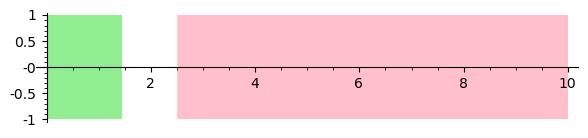

In [31]:
sig.plot()

In [32]:
csig1 = P.context_signal_for_system(system.with_y0(v3 + v3c), 10, **kwargs)

==> calling context signal
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2*x + 0.8000000000000000?)>, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integration_method=<IntegrationMethod.LOW_DEGREE: 2>, cutoff_threshold=1.00000000000000e-7, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = <ulbc.context_signals.ReachTree object at 0x7f0209fdecd0>
calling reach with y0 = ['[1.0000000000000000 .. 1.1000000000000001]', '[4.0000000000000000 .. 5.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..1.1]
C = [4.0..5.0]
contexts = ['[1.0..1.1]', '[4.0..5.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f0214

In [33]:
sig = csig1.signal

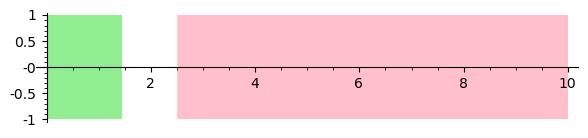

In [34]:
sig.plot()

In [35]:
csig2 = P.context_signal_for_system(system.with_y0(v3, v3c), 10, **kwargs)

==> calling context signal
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2*x + 0.8000000000000000?)>, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integration_method=<IntegrationMethod.LOW_DEGREE: 2>, cutoff_threshold=1.00000000000000e-7, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = <ulbc.context_signals.ReachTree object at 0x7f020a0229d0>
calling reach with y0 = [('[0.0000000000000000 .. 0.050000000000000003]', '[1.0000000000000000 .. 1.0500000000000001]'), ('[0.0000000000000000 .. 0.50000000000000000]', '[4.0000000000000000 .. 4.5000000000000000]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..0.05]
S = [1.0..1.05]
C = [0.0..0.5]
S = [4.0..4.5]
contexts = ['[0.0..0.05]', '[0.0..0.5]']
statics  = ['[1.0..1.05]', '[4.0..4.5]']
assigning system with dimension 2
resulting system has dimension 2
run

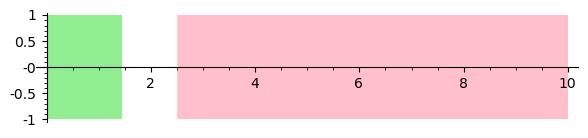

In [36]:
sig = csig2.signal
sig.plot()

In [37]:
sig = csig2.refined_signal(1)

==> creating ContextSignal with coord=(0,), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2*x + 0.8000000000000000?)>, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integration_method=<IntegrationMethod.LOW_DEGREE: 2>, cutoff_threshold=1.00000000000000e-7, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = None
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f021924bdc0>
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.13 seconds
roots = [[1.6652279432951417 .. 2.4699940280341771]]
domain = [0.0000000000000000 .. 10.001999999999999]
roots = [[1.6652279432951417 .. 2.4699940280341771]]
seg_domain = [0.0000000000000000 .. 10.001999999999999]
roots = [[1.6652279432951417 .. 2.4699940280341771]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0,), signal = Signal([0.00000000000

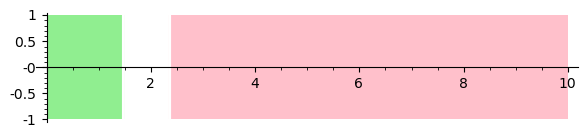

In [38]:
sig.plot()

In [39]:
sig = csig2.refined_signal(2)

==> creating ContextSignal with coord=(0, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2*x + 0.8000000000000000?)>, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integration_method=<IntegrationMethod.LOW_DEGREE: 2>, cutoff_threshold=1.00000000000000e-7, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = None
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f0215389dc0>
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.10 seconds
roots = [[1.7429878874332511 .. 2.4413530149450029]]
domain = [0.0000000000000000 .. 10.001999999999999]
roots = [[1.7429878874332511 .. 2.4413530149450029]]
seg_domain = [0.0000000000000000 .. 10.001999999999999]
roots = [[1.7429878874332511 .. 2.4413530149450029]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0), signal = Signal([0.0000000

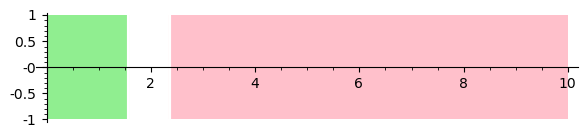

In [40]:
sig.plot()

In [41]:
from ulbc.interval_utils import fqqintervals, fintervals

In [42]:
fqqintervals(csig2.symbolic_space_domain)

'[[-1 .. 1], [-1 .. 1]]'

In [43]:
fqqintervals(csig2.children[0].symbolic_space_domain)

'[[-1 .. 0], [-1 .. 0]]'

In [44]:
fqqintervals(csig2.children[0].children[0].symbolic_space_domain)

'[[-1 .. -1/2], [-1 .. -1/2]]'

In [45]:
fqqintervals(csig2.absolute_space_domain)

'[[1 .. 21/20], [4 .. 9/2]]'

In [46]:
fqqintervals(csig2.children[0].absolute_space_domain)

'[[1 .. 21/20], [4 .. 9/2]]'

In [47]:
fintervals(csig2.children[0].absolute_space_domain)

'[[1.0000000000000000 .. 1.0500000000000001], [4.0000000000000000 .. 4.5000000000000000]]'

In [48]:
fqqintervals(csig2.children[0].children[0].absolute_space_domain)

'[[1 .. 21/20], [4 .. 9/2]]'

In [58]:
help(InitialForm)

Help on class InitialForm in module flowstar.reachability:

class InitialForm(enum.Enum)
 |  InitialForm(value, names=None, *, module=None, qualname=None, type=None, start=1)
 |  
 |  An enumeration.
 |  
 |  Method resolution order:
 |      InitialForm
 |      enum.Enum
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  COMBINED = <InitialForm.COMBINED: 1>
 |  
 |  REMAINDER = <InitialForm.REMAINDER: 2>
 |  
 |  SPLIT_VARS = <InitialForm.SPLIT_VARS: 3>
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from enum.Enum:
 |  
 |  name
 |      The name of the Enum member.
 |  
 |  value
 |      The value of the Enum member.
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties inherited from enum.EnumMeta:
 |  
 |  __members__
 |      Returns a mapping of member name->value.
 |      
 |      This mapping lists all enum members, including aliases. Not

In [49]:
csig3 = P.context_signal_for_system(system.with_y0(v3, v3c), 10,
                                    restriction_method=RestrictionMethod.RECOMPUTE_FLOWPIPE,
                                    **kwargs)

==> calling context signal
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2*x + 0.8000000000000000?)>, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integration_method=<IntegrationMethod.LOW_DEGREE: 2>, cutoff_threshold=1.00000000000000e-7, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = <ulbc.context_signals.ReachTree object at 0x7f0214e163a0>
calling reach with y0 = [('[0.0000000000000000 .. 0.050000000000000003]', '[1.0000000000000000 .. 1.0500000000000001]'), ('[0.0000000000000000 .. 0.50000000000000000]', '[4.0000000000000000 .. 4.5000000000000000]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..0.05]
S = [1.0..1.05]
C = [0.0..0.5]
S = [4.0..4.5]
contexts = ['[0.0..0.05]', '[0.0..0.5]']
statics  = ['[1.0..1.05]', '[4.0..4.5]']
assigning system with dimension 2
resulting system has dimension 2
run

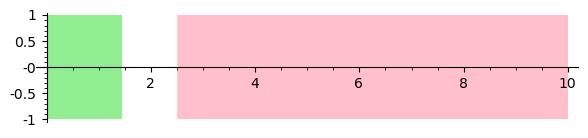

In [50]:
sig = csig3.signal
sig.plot()

In [51]:
sig = csig3.refined_signal(1)

==> creating ContextSignal with coord=(0,), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2*x + 0.8000000000000000?)>, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integration_method=<IntegrationMethod.LOW_DEGREE: 2>, cutoff_threshold=1.00000000000000e-7, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = <ulbc.context_signals.ReachTree object at 0x7f0214e163a0>
recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f0216ed8ac0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.0800000

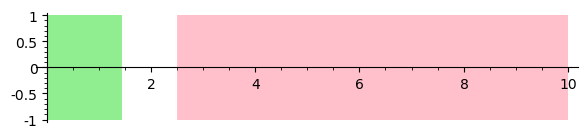

In [52]:
sig.plot()

In [53]:
sig = csig3.refined_signal(2)

- 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f0214dbf820>
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 1.10 seconds
roots = [[1.5664392158733055 .. 2.3445065240641730]]
domain = [0.0000000000000000 .. 10.001999999999999]
roots = [[1.5664392158733055 .. 2.3445065240641730]]
seg_domain = [0.0000000000000000 .. 10.001999999999999]
roots = [[1.5664392158733055 .. 2.3445065240641730]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 0), signal = Signal([0.0000000000000000 .. 10.000000000000000], [([0.0000000000000000 .. 1.5664392158733056], True), ([2.3445065240641729 .. 10.000000000000000], False)], mask=None), reach_tree = <ulbc.context_signals.ReachTree obj

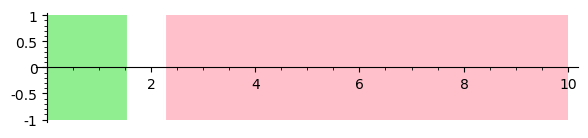

In [54]:
sig.plot()

In [55]:
help(system.with_y0)

Help on method with_y0 in module ulbc.bondcalculus:

with_y0(y0, y0_ctx=None) method of ulbc.bondcalculus.System instance



In [57]:
help(System)

Help on class System in module ulbc.bondcalculus:

class System(builtins.object)
 |  System(R, x: tuple, y0: tuple, y: tuple, varmap: Union[dict, NoneType] = None, y0_ctx: Union[tuple, NoneType] = None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, R, x: tuple, y0: tuple, y: tuple, varmap: Union[dict, NoneType] = None, y0_ctx: Union[tuple, NoneType] = None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  embed(self, expr)
 |      Embed an expression from the global variable manager
 |      within the variables of the system.
 |  
 |  n(self, name: str) -> Any
 |      Lookup the bond-calculus name for a variable with a given name.
 |  
 |  reach(self, duration, **kwargs) -> flowstar.reachability.Reach
 |  
 |  streamline_plot(self, xarg, yarg, **kwargs)
 |  
 |  v(self, name: str) -> Any
 |      Lookup a variable with a given name.
 |  
 |  varname(self, var) -> str
 |      Lookup the name of a g